In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Baph.wav to Baph.wav


In [4]:
!ls /content/

Baph.wav  sample_data


In [5]:
# https://www.fisheries.noaa.gov/national/science-data/sounds-ocean-mammals
audio_path = '/content/Baph.wav'
audio, sr = librosa.load(audio_path)
spectrogram = np.abs(librosa.stft(audio))

mfccs = librosa.feature.mfcc(y=audio, sr=sr)

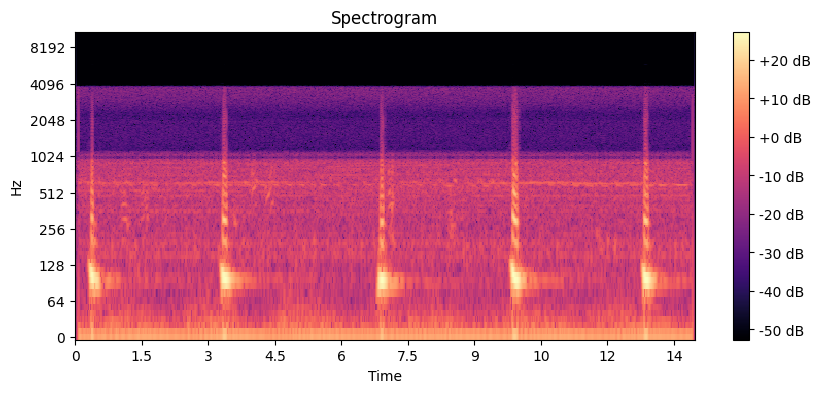

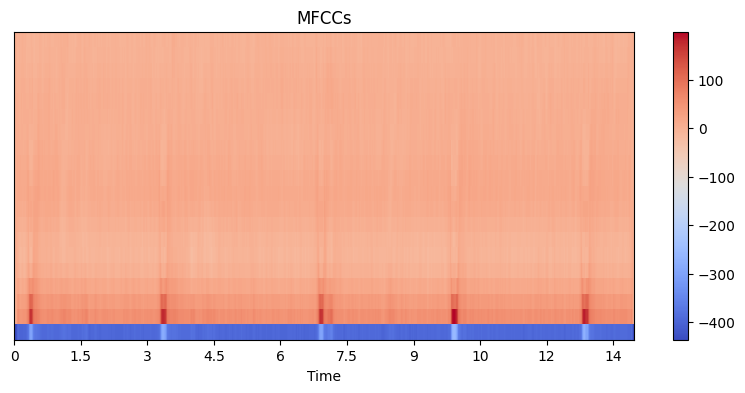

In [8]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()

In [7]:
# Calculate the MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr)

# Save the MFCCs as a CSV file
df_mfccs = pd.DataFrame(mfccs.T)  # Transpose the MFCCs for a proper DataFrame shape
output_file_csv = 'Baph_mfccs_data.csv'
df_mfccs.to_csv(output_file_csv, index=False)
print(f"MFCC data saved as {output_file_csv}")


MFCC data saved as Baph_mfccs_data.csv


In [10]:
!ls /content/

Baph_mfccs_data.csv  Baph.wav  sample_data


In [8]:
# Read the CSV file into a DataFrame
df_mfccs = pd.read_csv('Baph_mfccs_data.csv')

print(df_mfccs.head())


           0          1          2          3         4         5         6  \
0 -435.95010   0.235524   0.233693   0.230666  0.226480  0.221182  0.214839   
1 -435.34384   1.067575   0.998917   0.911182  0.833312  0.788170  0.783702   
2 -424.50894  15.460878  13.017341  10.127569  7.904726  6.983731  7.275709   
3 -400.62515  45.315950  32.773396  17.754612  5.927871  0.749462  2.149906   
4 -393.79126  53.610878  37.510384  18.126635  2.677182 -4.357872 -2.916933   

          7          8          9         10         11        12        13  \
0  0.207525   0.199329   0.190348   0.180689   0.170467  0.159806  0.148832   
1  0.810056   0.843844   0.857788   0.831923   0.761826  0.660661  0.554157   
2  8.137075   8.812363   8.861374   8.321831   7.550339  6.894259  6.438684   
3  7.179432  12.040359  14.200138  13.381411  11.040604  8.915682  7.728377   
4  3.398029   9.816671  13.032562  12.490677   9.839110  7.226225  5.730739   

         14        15        16        17        1

                0           1           2           3           4           5  \
count  602.000000  602.000000  602.000000  602.000000  602.000000  602.000000   
mean  -387.297392   61.305087   41.842539   19.261962    1.925131   -5.530609   
std     21.193833   25.226683   15.957522    9.269799    6.772897    5.948969   
min   -435.959260    0.223115    0.222909    0.222562  -14.194698  -23.071644   
25%   -394.999767   51.651765   34.639639   13.691202   -2.309779   -9.094025   
50%   -392.535205   55.002798   37.350801   16.738923    0.598368   -6.542088   
75%   -389.126230   59.639523   41.660904   21.067174    4.186503   -3.484871   
max   -256.691130  198.609280  113.521850   55.644016   31.710667   19.466442   

                6           7           8           9          10          11  \
count  602.000000  602.000000  602.000000  602.000000  602.000000  602.000000   
mean    -3.309701    4.246290   11.351307   14.227280   12.701948    9.115160   
std      5.152468    4.7442

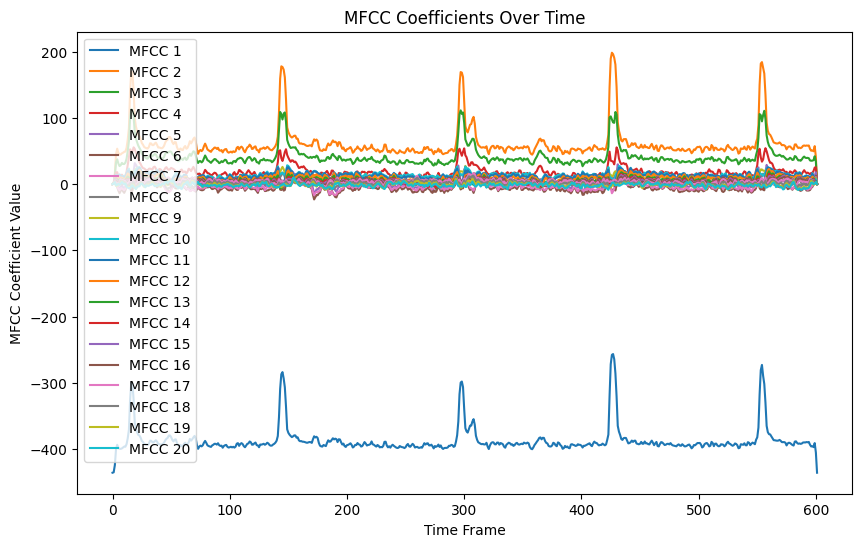

In [9]:
# Data Analysis and Exploration:

# Calculate statistics of the MFCC data
statistics = df_mfccs.describe()
print(statistics)

# Plot the MFCC coefficients over time
plt.figure(figsize=(10, 6))
for i in range(df_mfccs.shape[1]):
    plt.plot(df_mfccs.index, df_mfccs.iloc[:, i], label=f'MFCC {i+1}')
plt.xlabel('Time Frame')
plt.ylabel('MFCC Coefficient Value')
plt.title('MFCC Coefficients Over Time')
plt.legend()
plt.show()

Random Forest Classifier Accuracy: 0.0
Random Forest Classifier Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00       1.0
           4       1.00      0.00      0.00       1.0
           9       0.00      1.00      0.00       0.0
          10       1.00      0.00      0.00       1.0
          12       1.00      0.00      0.00       1.0
          15       0.00      1.00      0.00       0.0
          20       0.00      1.00      0.00       0.0
          21       0.00      1.00      0.00       0.0
          22       0.00      1.00      0.00       0.0
          26       1.00      0.00      0.00       1.0
          27       1.00      0.00      0.00       1.0
          30       0.00      1.00      0.00       0.0
          33       0.00      1.00      0.00       0.0
          34       1.00      0.00      0.00       1.0
          36       1.00      0.00      0.00       1.0
          44       1.00      0.00      0.00       1.0
        

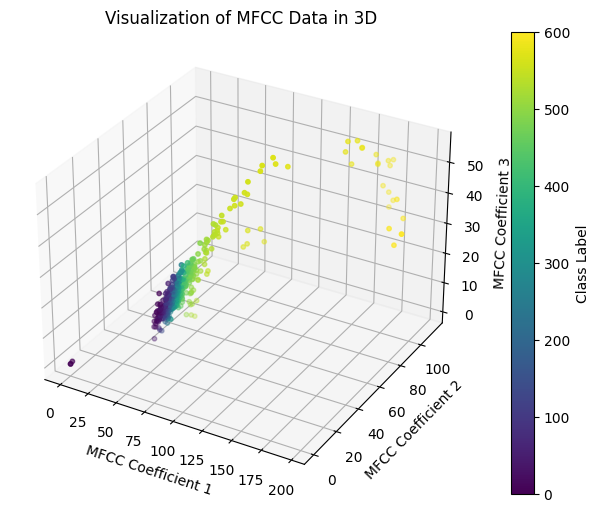

In [10]:
# Import the 3D plotting library
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV file containing the MFCC data
df = pd.read_csv('/content/Baph_mfccs_data.csv')

# Assuming '0' is the correct column name for class labels
# Separate features (MFCCs) and labels
X = df.drop('0', axis=1)
y = df['0']

# Convert class labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Generate a classification report with zero_division parameter set to 1
report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
print("Random Forest Classifier Report:\n", report_rf)

# Visualize the data in a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Use the first three columns as the first three MFCC coefficients for the 3D scatter plot
scatter = ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], X_train.iloc[:, 2], c=y_train, cmap='viridis', s=10)

ax.set_xlabel('MFCC Coefficient 1')
ax.set_ylabel('MFCC Coefficient 2')
ax.set_zlabel('MFCC Coefficient 3')
ax.set_title('Visualization of MFCC Data in 3D')

# Add a color bar to show the mapping of class labels to colors
cbar = plt.colorbar(scatter)
cbar.set_label('Class Label')

plt.show()


In [11]:
print(df.columns)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19'],
      dtype='object')


In [12]:
print("Unique Labels:", np.unique(y))


Unique Labels: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242

In [13]:
# Assuming 'X_train' is the Pandas DataFrame containing features for the training set

# Print the unique values in each column of the training set
for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in '1': [ 47.539948    52.11654     57.29374     66.083435    54.319595
  74.665245   168.54031     55.53189     56.746307    48.841705
  55.216988    51.125492    70.47186     55.10608     53.453167
  51.642925    50.560318   150.27696     64.59822    140.62419
  52.688652    68.64773     55.079002    54.845573    59.742905
  51.933895    52.60389     61.497425     0.23552369  53.251045
  55.037018    55.557343    55.51501     56.153103    47.622032
  74.72023     56.655243    56.68756     53.26622     68.82073
  53.243874   141.13712     55.679863    49.89888    178.03595
  53.105995    45.329376    57.55949     52.715897    49.048626
  50.73681     51.5848      51.11621     57.856575    63.372894
  46.749596    65.9211      51.524895    47.001137    52.527306
  52.47058      0.22311537  51.147316    67.899124    50.49469
  57.542507    56.26289     52.74392     50.72977     50.97631
  53.727165    68.43802     52.09619     50.721684    53.7259
  55.07791     54.00074  

In [14]:
# Print the unique class labels in the training set
unique_labels = np.unique(y_train)
print("Unique Labels:", unique_labels)


Unique Labels: [  0   1   2   5   6   7   8   9  11  13  14  15  16  17  18  19  20  21
  22  23  24  25  28  29  30  31  32  33  35  37  38  39  40  41  42  43
  46  49  50  51  52  53  54  55  56  57  63  64  65  66  67  68  69  70
  71  72  75  76  77  78  79  80  81  82  84  88  89  90  91  93  94  96
  97  98  99 100 101 102 103 105 106 107 108 109 110 111 112 113 115 116
 117 122 124 125 126 127 128 129 130 131 132 133 134 135 137 138 139 140
 141 142 145 146 147 148 149 150 151 153 154 155 157 158 159 161 163 164
 165 166 167 168 169 170 171 172 173 174 177 178 179 180 182 183 184 185
 186 187 188 189 190 191 192 195 196 197 198 200 201 202 203 204 206 207
 208 209 210 211 212 213 214 215 216 218 219 221 223 224 225 226 228 229
 230 231 232 233 235 237 238 239 240 241 242 243 244 245 247 248 249 250
 251 253 254 255 257 259 260 262 263 264 265 266 267 269 270 271 272 273
 274 275 276 277 278 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 295 296 297 298 300 301 302 303

In [15]:
!ls /content/

Baph_mfccs_data.csv  Baph.wav  sample_data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.manifold import TSNE
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC

# Load your dataset (replace 'path_to_dataset.csv' with the actual path)
df = pd.read_csv('Baph_mfccs_data.csv')

# Drop rows with all zeros
df = df.loc[~(df == 0).all(axis=1)]

# Extract the features (MFCCs) and labels from the CSV file
X = df.drop('19', axis=1)  # Assuming 'Label' is the column name for class labels
y = df['19']  # Assuming 'Label' is the column name for class labels

# Convert class labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Manually set the class index for the 'dolphin' class if present
dolphin_class = 'dolphin'
if dolphin_class in label_encoder.classes_:
    dolphin_class_index = label_encoder.transform([dolphin_class])[0]
else:
    # If 'dolphin' class is not present, set the index to a value not present in the original class labels
    dolphin_class_index = len(label_encoder.classes_)

# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply RandomOverSampler to balance the class distribution
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Print class distribution to check for low instances
unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)
print("Class Distribution after Oversampling:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} instances")

# Create and train the SVM classifier with hyperparameter tuning
svm_classifier = SVC(random_state=42)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
cv = LeaveOneOut()  # Leave-one-out cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=cv)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters and accuracy on the training set
print("Best Parameters:", best_params)
print("Accuracy on Training Set:", best_model.score(X_train_resampled, y_train_resampled))

# Visualize the t-SNE scatter plot for dolphin and non-dolphin samples
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_resampled)

# Separate the t-SNE results for dolphin and non-dolphin samples
X_tsne_dolphin = X_tsne[y_train_resampled == dolphin_class_index]
X_tsne_non_dolphin = X_tsne[y_train_resampled != dolphin_class_index]

# Create a scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_dolphin[:, 0], X_tsne_dolphin[:, 1], c='blue', label='Dolphin')
plt.scatter(X_tsne_non_dolphin[:, 0], X_tsne_non_dolphin[:, 1], c='red', label='Non-Dolphin')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of MFCC Features')
plt.legend()
plt.show()


<ipython-input-16-167dd5f3eb69>:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if dolphin_class in label_encoder.classes_:


Class Distribution after Oversampling:
Class 0: 1 instances
Class 3: 1 instances
Class 5: 1 instances
Class 7: 1 instances
Class 9: 1 instances
Class 10: 1 instances
Class 11: 1 instances
Class 12: 1 instances
Class 13: 1 instances
Class 15: 1 instances
Class 17: 1 instances
Class 18: 1 instances
Class 20: 1 instances
Class 24: 1 instances
Class 25: 1 instances
Class 26: 1 instances
Class 28: 1 instances
Class 31: 1 instances
Class 32: 1 instances
Class 33: 1 instances
Class 34: 1 instances
Class 36: 1 instances
Class 37: 1 instances
Class 39: 1 instances
Class 40: 1 instances
Class 42: 1 instances
Class 43: 1 instances
Class 44: 1 instances
Class 45: 1 instances
Class 46: 1 instances
Class 47: 1 instances
Class 48: 1 instances
Class 49: 1 instances
Class 50: 1 instances
Class 51: 1 instances
Class 52: 1 instances
Class 53: 1 instances
Class 54: 1 instances
Class 55: 1 instances
Class 56: 1 instances
Class 57: 1 instances
Class 58: 1 instances
Class 60: 1 instances
Class 61: 1 instance